# Выпускная квалификационная работа по курсу «Data Science»

В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

## Изучение теоретических основ и методов решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

**Тема:** Прогнозирование конечных свойств новых материалов (композиционных материалов).\
**Описание:**\
Композиционные материалы - это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т.е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).\
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## Провести разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

In [98]:
#Подключаю доступ к файлам на Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
# Пути для гугл драйв
nb_path = '/content/drive/MyDrive/Colab Notebooks/'
data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [100]:
#Импорт нужных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.9.2


In [101]:
#Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [102]:
#Загрузка исходных данных из файла X_bp

X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col = 0)
X_bp.shape

(1023, 10)

In [103]:
#Загрузка исходных данных из файла X_nup

X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col = 0)
X_nup.shape

(1040, 3)

In [104]:
#Свойства X_bp 
pd.DataFrame(X_bp.columns, columns = ['X_bp свойства'])

X_bp свойства
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [105]:
#Свойства X_nup
pd.DataFrame(X_nup.columns, columns = ['X_nup свойства'])


X_nup свойства
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

В задании указанно, что это единый набор данных, и он требует объединения с типом INNER. 

In [106]:
#Объединяю датасеты
df = X_bp.join(X_nup, how = 'inner')
df.shape

(1023, 13)

Датасет теперь состоит из 1023 строк, часть строк из таблицы X_nup была отброшена.

In [107]:
#Сохраню новый объединенный датасет в файл
df.to_excel(data_path + 'data_merged.xlsx')


In [108]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [109]:
#Посмотрим на типы данных указанных свойств
df.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Все свойства имеют тип float64, значит строковых значений вместо чисел нет. 

In [110]:
#Рассмотрим есть ли пропуски в столбцах
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

In [111]:
#Посмотрим на количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [112]:
#Посмотрим описательную статистику
df_describe = df.describe().T
df_describe['median'] = df.median()
df_describe.style.format(precision=4)

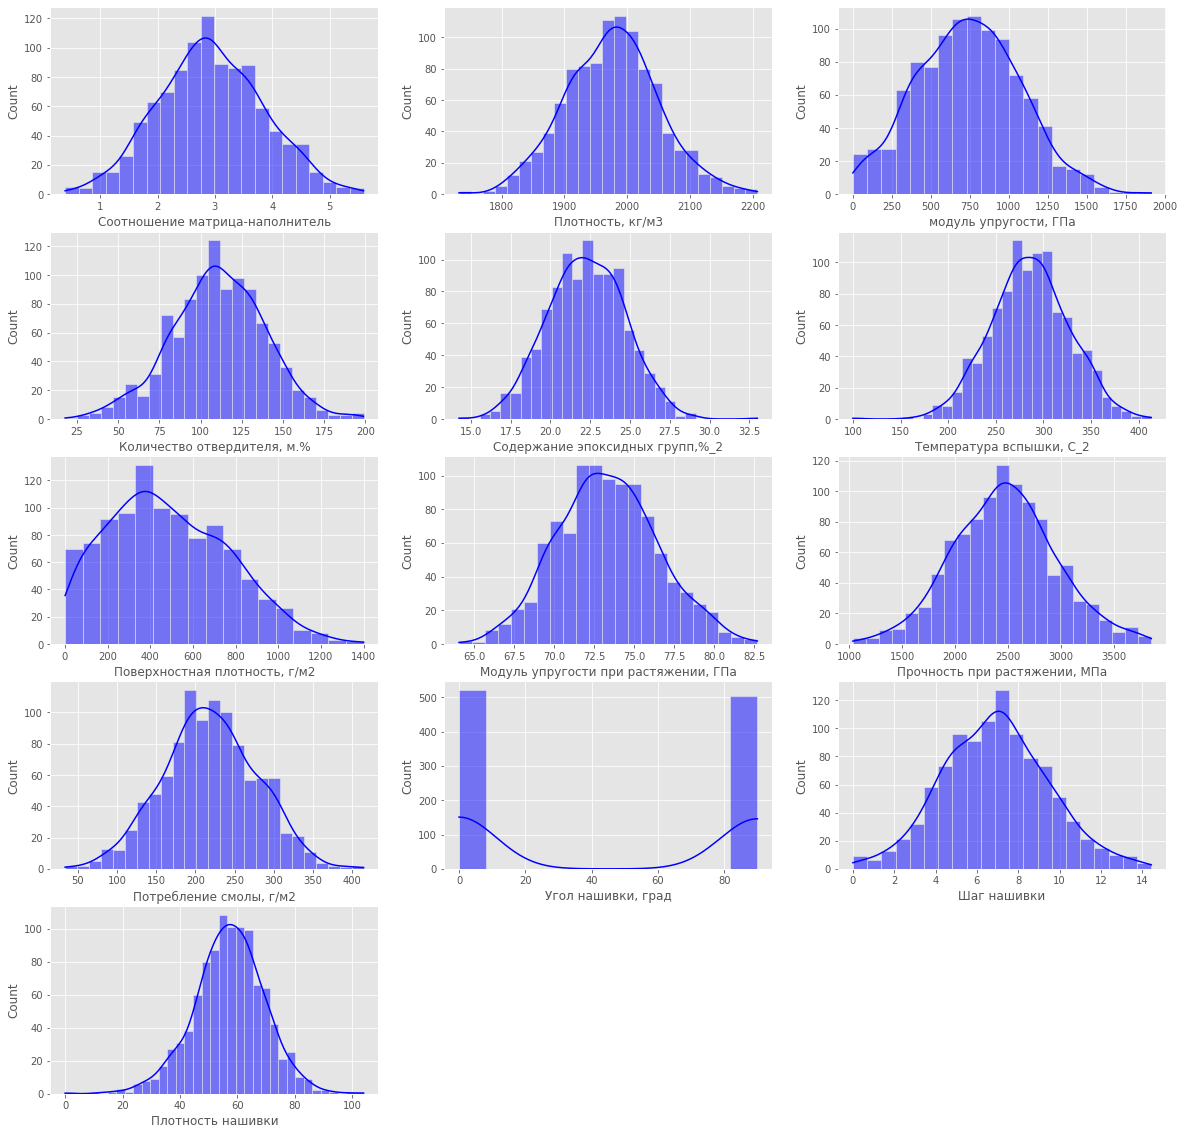

In [113]:
# Гистограммы распределения
i = 1
plt.figure(figsize = (20,20))
plt.style.use('ggplot')
for col in df.columns:
    plt.subplot(5,3,i)
    sns.histplot(df[col], color = 'blue', kde = True)
    i = i + 1
plt.show()


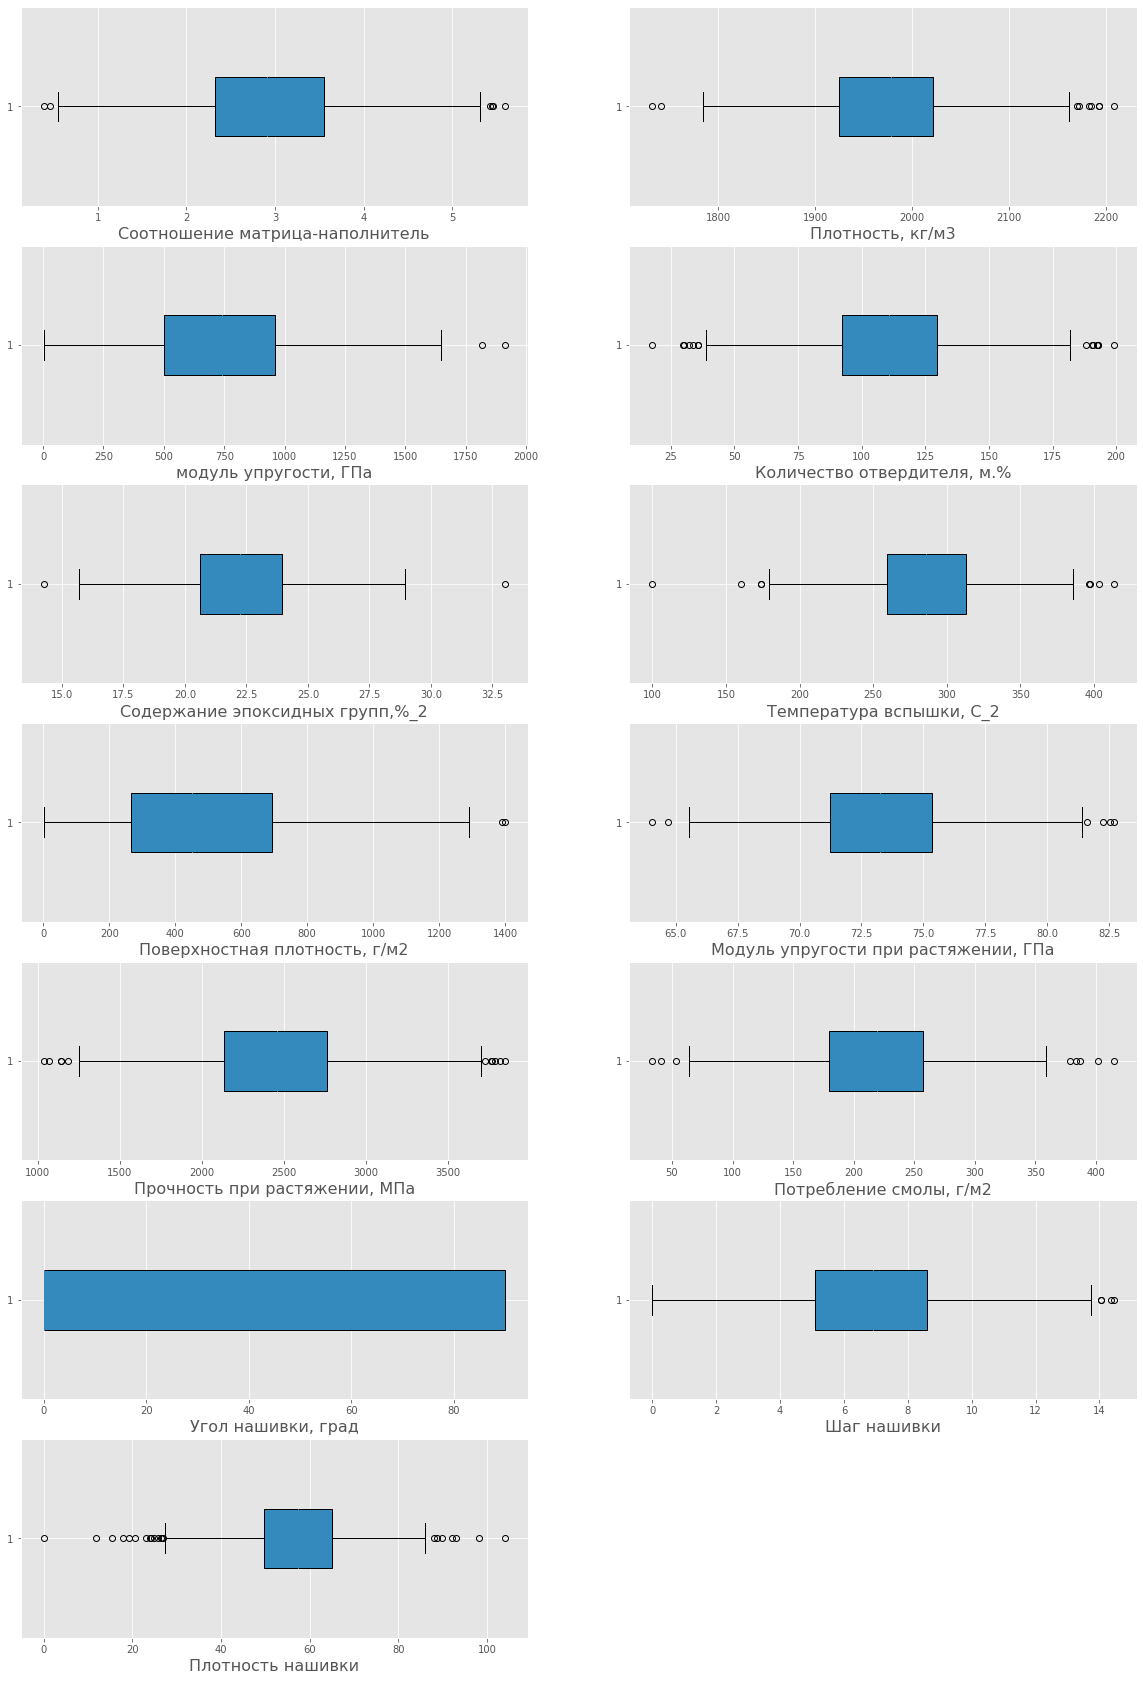

In [114]:
# Диаграммы "ящик с усами"
i = 1
plt.figure(figsize = (20,30))
plt.style.use('ggplot')
for col in df.columns:
    plt.subplot(7,2,i)
    plt.xlabel(col, fontsize = 16)
    plt.boxplot(df[col], patch_artist = True, vert = False, widths = 0.3)
    i = i + 1
plt.show()

**Вывод:** Все признаки имеют нормальное распределение, кроме признака "Угол нашивки, град". Признаки количественные, вещественные, принимают неотрицательные значения.
Признак "Угол нашивки, град" принимает 2 значения, его можно превратить в бинарный признак.

In [115]:
#Построим попарные графики рассеяния
sns.pairplot(df, height=8)

На графиках видно, что выбросы есть. Некоторые точки значительно удалены от общего кластера точек.
Теперь надо найти выбросы. 

Найду выбросы.

Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. Экспериментирую, как они отработают на данном наборе данных.

Соотношение матрица-наполнитель: 3s=0 iq=6


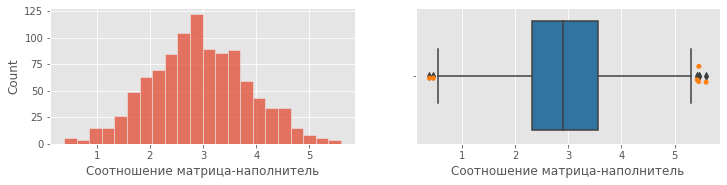

Плотность, кг/м3: 3s=3 iq=9


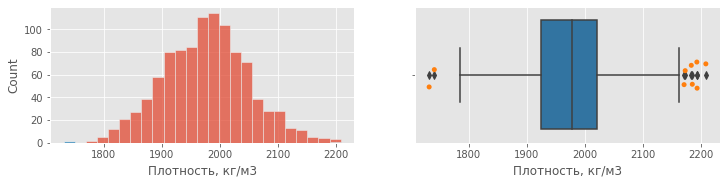

модуль упругости, ГПа: 3s=2 iq=2


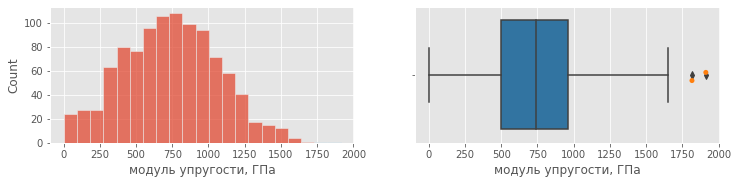

Количество отвердителя, м.%: 3s=2 iq=14


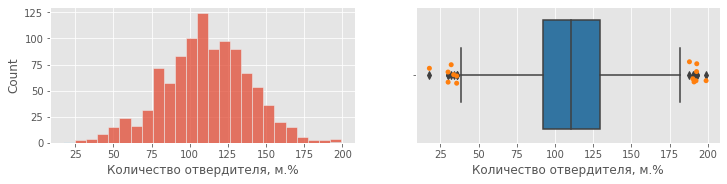

Содержание эпоксидных групп,%_2: 3s=2 iq=2


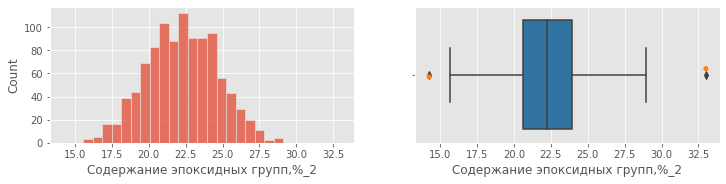

Температура вспышки, С_2: 3s=3 iq=8


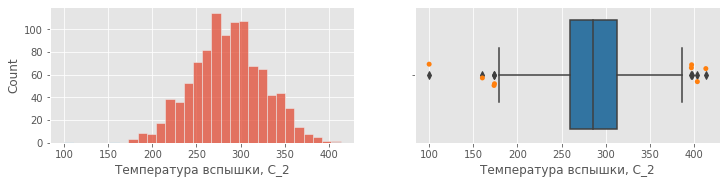

Поверхностная плотность, г/м2: 3s=2 iq=2


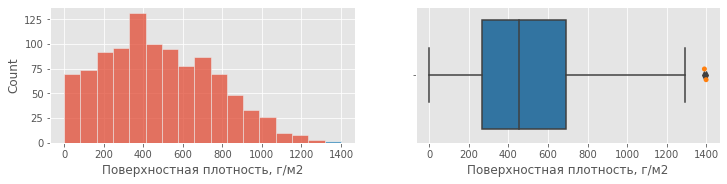

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


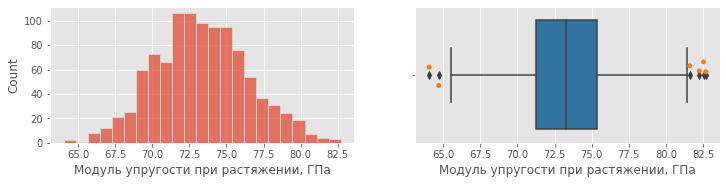

Прочность при растяжении, МПа: 3s=0 iq=11


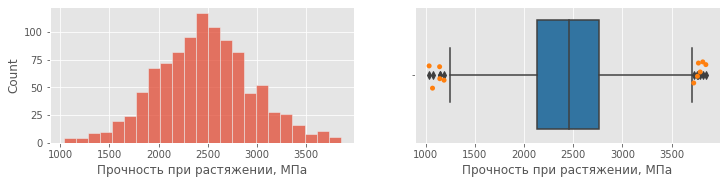

Потребление смолы, г/м2: 3s=3 iq=8


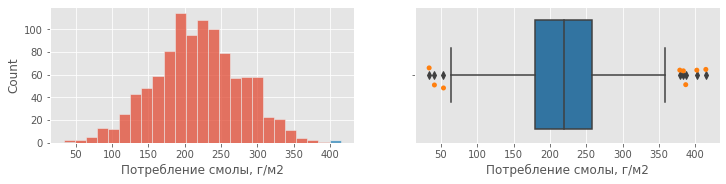

Угол нашивки, град: 3s=0 iq=0


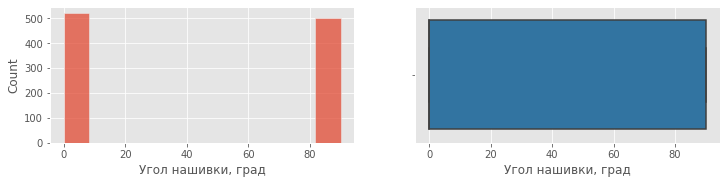

Шаг нашивки: 3s=0 iq=4


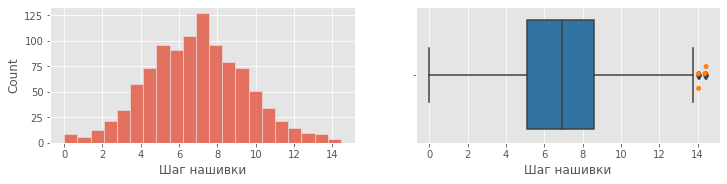

Плотность нашивки: 3s=7 iq=21


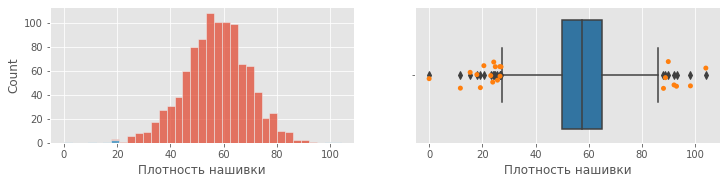

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [116]:
count_3s = 0
count_iq = 0
for column in df:
  d = df.loc[:, [column]]
  zscore = (df[column] - df[column].mean()) / df[column].std()
  d['3s'] = zscore.abs() > 3
  count_3s += d['3s'].sum() #метод 3х сигм
  q1 = np.quantile(df[column], 0.25)
  q3 = np.quantile(df[column], 0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  d['iq'] = (df[column] <= lower)| (df[column] >= upper)
  count_iq += d['iq'].sum() #метод межквартильных расстояний
  print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
  fig, axes = plt.subplots(1,2, figsize = (12, 2.5))
  sns.histplot(data = d, x = column, hue = '3s', multiple = 'stack', legend = False, ax = axes[0])
  sns.boxplot(data = d, x = column, color = 'tab:blue', ax = axes[1])
  sns.stripplot(data=d[d['iq'] == True], x=column, color = 'tab:orange', ax=axes[1])
  plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)




Итог:

Метод 3-х сигм, выбросов: 24

Метод межквартильных расстояний, выбросов: 93

Применю метод 3-х, чтобы потерять меньше значимой информации, так как датасет уже очищен от лишней информации.

In [117]:
#Удаляем выбросы методом 3-х сигм
outliers = pd.DataFrame(index = df.index)
for column in df:
  zscore = (df[column] - df[column].mean()) / df[column].std()
  outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [118]:
# Сохраняем очищенные данные
df.to_excel(data_path + 'clean_data.xlsx')

Смущает то, что по внешнему виду графиков мы не видим никаких зависимостей между признаками. То, что входные переменные независимы друг от друга - это хорошо. Но выходые переменные должны как-то зависеть от входных, чтобы модель могла найти эту зависимость и использовать ее для предсказания.

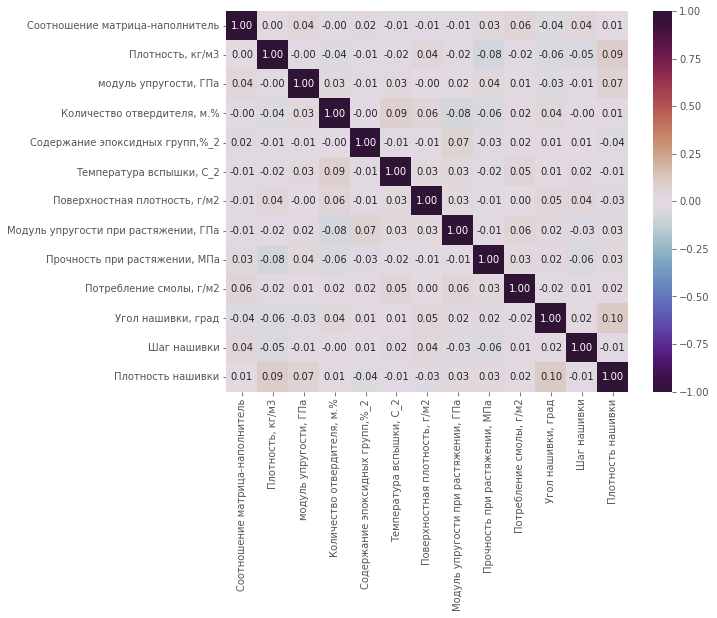

In [119]:
#Попробуем рассмотреть матрицу корреляции
corr = df.corr()
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt = '.2f', cmap = 'twilight_shifted', ax = ax)
plt.show()

По матрице мы видим, что коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаю, что применение линейных моделей регрессии не даст приемлемого результата.

# **Обучение моделей**


В этом разделе необходимо:
* 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
* Провести предобработку данных (нормализация и т.д.).
* При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [120]:
#Загрузим очищенные данные
df = pd.read_excel(data_path + 'clean_data.xlsx', index_col = 0)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

**Разделить данные на входные и выходные признаки**

Статистическими методами мы зависимостей не обнаружили. Хорошо бы узнать, какие связи между признаками видит специалист по предметной области. 

Можно предположить, что признаки делятся на:
* свойства матрицы;
* свойства наполнителя;
* свойства смеси и производственного процесса;
* свойства готового композита.

В этом случае целевые признаки имеют зависимости вида:
* модуль упругости при растяжении, Гпа (композит) = f(матрица, наполнитель, процесс);
* прочность при растяжении, МПа (композит) = f(матрица, наполнитель, процесс);
* соотношение матрица-наполнитель (процесс) = f(матрица, наполнитель, композит).

Для каждого из целевых признаков построю отдельную модель, следовательно решу 3 отдельные задачи.

In [121]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [122]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [123]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

# Препроцессинг

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение). 

Препроцессинг для категориальных и количественных признаков выполняем по-разному.

Категориальный признак один - 'Угол нашивки, град'. Он принимает значения 0 и 90. Использую OrdinalEncoder, чтобы признак принимал значения 0 и 1.

Вещественных количественных признаков у нас большинство. Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую стандартизацию и StandardScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Поэтому удобно реализовать предварительную обработку с помощью ColumnTransformer. Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные никак не изменяю.

In [124]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [125]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [126]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [127]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

In [128]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаем вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

# Выбор модели

Для сравнения моделей используют несколько метрик. Для статистической устойчивости результатов используют кросс-валидацию. Оформим запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [129]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [130]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

Вспомогательная функция для получения метрик предсказания.

In [131]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

# Модель для модуля упругости при растяжении, ГПа

In [132]:
# Разделим данные на тренировочную и тестовую выборку
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [133]:
# Выполним препроцессинг входных переменных
x1_train_edit = preprocessor1.fit_transform(x1_train)
x1_test_edit = preprocessor1.transform(x1_test)

In [134]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [135]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train)

In [136]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train_edit, columns=(x1_continuous + x_categorical)))

In [137]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y1_train))

In [138]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train_edit, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных нами моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [139]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [140]:
# Попробую подобрать параметры для модели Ridge
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train_edit, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
238  {'alpha': 480, 'solver': 'lsqr'} -2.455526     1

In [141]:
# Попробую подобрать параметры для модели Lasso
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train_edit, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
6  {'alpha': 0.15} -2.459921     1

In [142]:
# Попробую подобрать параметры для модели SVR
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train_edit, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
3  {'C': 0.015, 'kernel': 'linear'} -2.456808     1

In [143]:
# Попробую подобрать параметры для KNeighborsRegressor
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train_edit, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
11  {'n_neighbors': 25} -2.461113     1

In [144]:
# Попробую подобрать параметры для DecisionTreeRegressor
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train_edit, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
159  {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 10, 'random_state': 3128, 'splitter': 'random'}   

         MAE  rank  
159 -2.43505     1

In [145]:
# Попробую подобрать параметры для RandomForestRegressor
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train_edit, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==10]

params  \
8  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'random_state': 3128}   

        MAE  rank  
8 -2.457202    10

In [146]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train_edit, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели.

> Блок с отступами



Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при кропотливом подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

Собирая деревья в ансамбли, можно еще улучшить характеристики. Но подбор параметров затруднен тем, что это затратный по времени процесс. Почему-то мне не удалось получить комбинацию параметров для леса, которая была был лучше дерева решений.

In [147]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train_edit, y1_train)
y1_pred_base = base_model1.predict(x1_test_edit)

In [148]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train_edit, y1_train)
y1_pred_best = best_model1.predict(x1_test_edit)

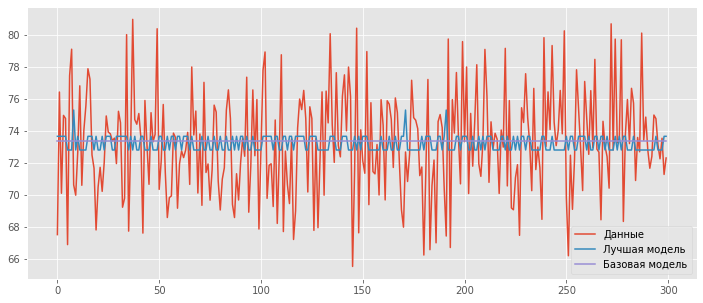

In [149]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Сложно визуализировать регрессию в многомерном пространстве. Но даже на таком графике мы видим, насколько не соответствует лучшая модель исходным данным.

In [150]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1.append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.001377 -3.222954 -2.577796 -0.035319   
Лучшая модель (дерево решений) -0.035776 -3.277844 -2.610243 -0.035707   

                                max_error  
Базовая модель                  -7.800690  
Лучшая модель (дерево решений)  -8.152045

## Модель для прочности при растяжении, МПа

In [151]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [152]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.transform(x2_train_raw)

In [153]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [154]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [155]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [156]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y2_train))

In [157]:
# Запускем различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

In [158]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [159]:
# Попробую подобрать параметры для модели Ridge
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
494  {'alpha': 990, 'solver': 'sparse_cg'} -385.891069     1

In [160]:
# Попробую подобрать параметры для модели Lasso
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
7   {'alpha': 50} -385.827028     1
8   {'alpha': 60} -385.827028     1
9  {'alpha': 100} -385.827028     1

In [161]:
# Попробую подобрать параметры для модели SVR
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
12  {'C': 0.2, 'gamma': 'scale', 'kernel': 'rbf'} -385.724279     1

In [162]:
# Попробую подобрать параметры для DecisionTreeRegressor
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
231  {'criterion': 'poisson', 'max_depth': 3, 'max_features': 6, 'random_state': 3128, 'splitter': 'random'}   

            MAE  rank  
231 -384.045197     1

In [163]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
0  {'loss': 'squared_error', 'max_depth': 1, 'max_features': 1, 'n_estimators': 50, 'random_state': 3128}   

          MAE  rank  
0 -385.268908     1

In [164]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же попробовала несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовала GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.
Подбор гиперпараметров - интересный процесс. Но нам он не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

In [165]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [166]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

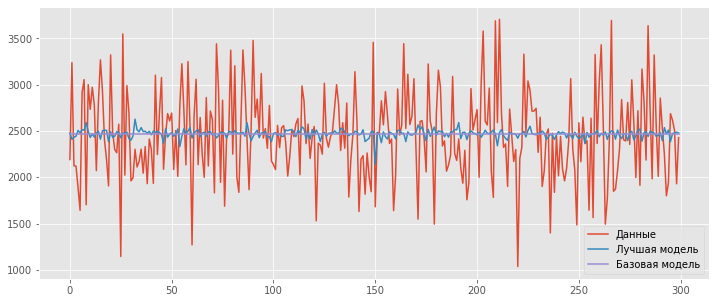

In [167]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Но результаты выглядят более "естественно", чем те, что получены деревом решений для модуля упругости при растяжении.

In [168]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

R2        RMSE         MAE  \
Базовая модель                      -0.000531 -479.694153 -375.066608   
Лучшая модель (градиентный бустинг)  0.004028 -478.600202 -376.647056   

                                         MAPE    max_error  
Базовая модель                      -0.165566 -1431.321957  
Лучшая модель (градиентный бустинг) -0.166046 -1384.841404

# Модель для соотношения матрица-наполнитель

In [169]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [170]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.transform(x3_train_raw)

In [171]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [172]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [173]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [174]:
# Описательная статистика выходной переменной
show_statistics(pd.DataFrame(y3_train))

По заданию для соотношения матрица-наполнитель необходимо построить нейросеть. 

Но базовая модель DummyRegressor, возвращающая среднее, для оценки качества модели тоже понадобится.

In [175]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

In [176]:
# Предсказание базовой модели
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [177]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [178]:
# Собираю нейросеть
model3_2 = construct_model()

# Компилирую нейросеть
model3_2 = compile_model(model3_2)

# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)                6

In [179]:
%%time
#Обучение нейросети
history = model3_2.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 86.1233 - root_mean_squared_error: 2.7122 - val_loss: 67.4275 - val_root_mean_squared_error: 2.2417
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 45.3006 - root_mean_squared_error: 1.5769 - val_loss: 34.3311 - val_root_mean_squared_error: 1.0705
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 36.3335 - root_mean_squared_error: 1.1593 - val_loss: 34.8042 - val_root_mean_squared_error: 1.3122
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 34.6819 - root_mean_squared_error: 1.1900 - val_loss: 30.3762 - val_root_mean_squared_error: 1.0763
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 33.3264 - root_mean_squared_error: 1.1047 - val_loss: 30.5956 - val_root_mean_squared_error: 1.1365
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 32.4373 - root_mean_squared_error: 1.1258 - val_loss: 29.6293 - val

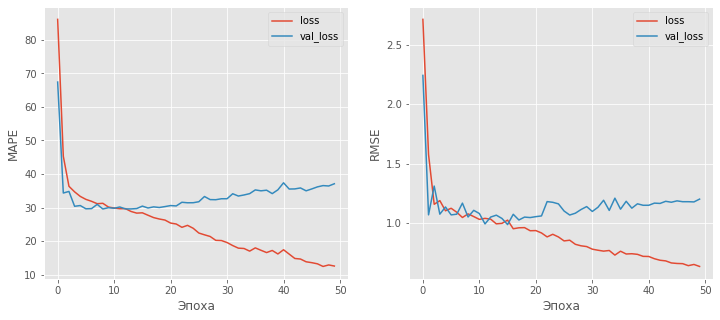

In [180]:
plot_loss(history.history)

In [181]:
# Проверяем точность нейросети на тестовых данных
model3_2.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 37.3033 - root_mean_squared_error: 1.1654


[37.30325698852539, 1.1654454469680786]

In [182]:
# Предсказание 
y3_pred_keras2 = model3_2.predict(x3_test)

10/10 [==============================] - 0s 1ms/step


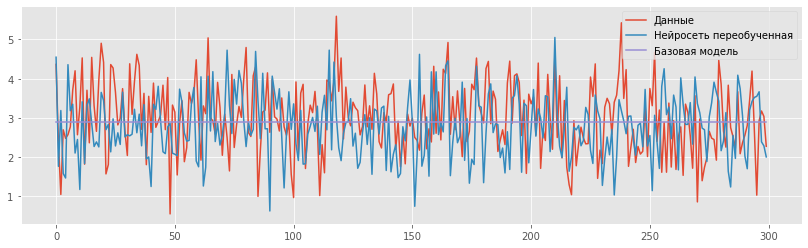

In [183]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [184]:
#Методом борьбы с переобучением является добавление Dropout-слоя.
# Построение аналогичной модели с Dropout слоем
model3_3 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [185]:
# Компиляция модели
model3_3 = compile_model(model3_3)

In [186]:
# Архитектура изменилась
model3_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [187]:
%%time
#Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 97.1614 - root_mean_squared_error: 2.9667 - val_loss: 91.2846 - val_root_mean_squared_error: 2.8512
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 77.7533 - root_mean_squared_error: 2.5193 - val_loss: 53.8015 - val_root_mean_squared_error: 1.9267
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 42.9728 - root_mean_squared_error: 1.4841 - val_loss: 32.7068 - val_root_mean_squared_error: 1.1550
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 41.5130 - root_mean_squared_error: 1.3611 - val_loss: 32.1090 - val_root_mean_squared_error: 1.2762
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 40.2742 - root_mean_squared_error: 1.3446 - val_loss: 31.5355 - val_root_mean_squared_error: 1.2463
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 35.7857 - root_mean_squared_error: 1.2481 - val_loss: 29.9641 - val

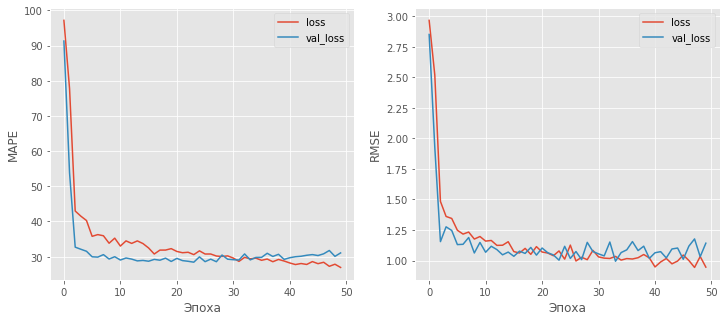

In [188]:
plot_loss(history.history)

In [189]:
# Проверяем точность нейросети на тестовых данных
model3_3.evaluate(x3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 33.4842 - root_mean_squared_error: 1.1909


[33.48416519165039, 1.1908578872680664]

In [190]:
# Предсказание 
y3_pred_keras3 = model3_3.predict(x3_test)

10/10 [==============================] - 0s 1ms/step


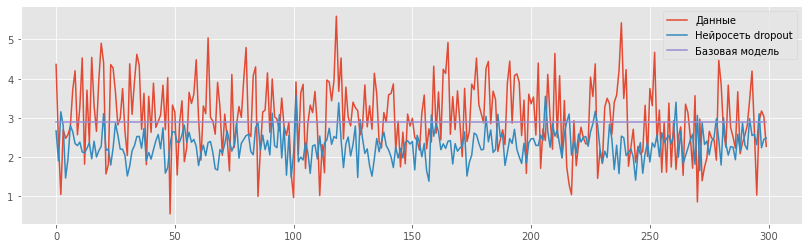

In [192]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [193]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras3))
compare3_2

R2      RMSE       MAE      MAPE  max_error
DummyRegressor          -0.011269 -0.911261 -0.737067 -0.299795  -2.684301
Нейросеть переобученная -0.654114 -1.165445 -0.954058 -0.373033  -2.762262
Нейросеть dropout       -0.727036 -1.190858 -0.970366 -0.334842  -3.112869

# Оценить точность модели на тренировочном и тестовом датасете

In [194]:
#Модель для модуля упругости при растяжении
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=3128, splitter='random')

In [195]:
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train_edit)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test_edit)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
result1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.017295 -3.037284 -2.410294 -0.032850   
Модуль упругости, тестовый      -0.035776 -3.277844 -2.610243 -0.035707   

                                 max_error  
Модуль упругости, тренировочный  -9.008468  
Модуль упругости, тестовый       -8.152045

Дерево решений имеет ошибку на тренировочном датасете меньше, чем на тестовом, потому что чему-то все-таки оно научилось. Но даже на тренировочном датасете оно не нашло закономерности во входных данных.

In [196]:
#Модель для прочности при растяжении
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=3128)

In [197]:
result2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
result2 = pd.concat([result2, get_metrics('Прочность при растяжении, тестовый', y2_test, y2_pred_test)])
result2

R2        RMSE         MAE  \
Прочность при растяжении, тренировочный  0.057141 -472.832206 -374.670333   
Прочность при растяжении, тестовый       0.004028 -478.600202 -376.647056   

                                             MAPE    max_error  
Прочность при растяжении, тренировочный -0.164825 -1383.885510  
Прочность при растяжении, тестовый      -0.166046 -1384.841404

Градиентный бустинг - это прекрасный метод, который показал положительный, хоть и близкий к 0 коэффициент детерминации. Ошибка на тестовом множестве незначительно больше, чем на тренировочном. Значит, модель нашла следы зависимости, а не выучила данные.

In [198]:
# Модель для соотношения матрица-наполнитель
model3_3

In [199]:
result3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
result3 = pd.concat([result3, get_metrics('Соотношение матрица-наполнитель, тестовый', y3_test, y3_pred_test)])
result3

10/10 [==============================] - 0s 2ms/step


R2      RMSE       MAE  \
Соотношение матрица-наполнитель, тренировочный -0.323193 -1.044150 -0.795323   
Соотношение матрица-наполнитель, тестовый      -0.727036 -1.190858 -0.970366   

                                                    MAPE  max_error  
Соотношение матрица-наполнитель, тренировочный -0.267259  -3.750573  
Соотношение матрица-наполнитель, тестовый      -0.334842  -3.112869

У нейросети показатели для тестовой выборки сильнее отличаются в худшую сторону от показателей тренировочной. Она не нашла закономерностей, а стала учить данные из тестовой выборки.

# Сохранение моделей

Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [200]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [201]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [202]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [203]:
save_object_with_pickle(best_model1, 'model1_best')

In [204]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [205]:
save_object_with_pickle(best_model2, 'model2_best')

In [208]:
model3_3.save(models_path + '/model3_3/')

Проверяем загрузку моделей

In [209]:
preprocessor1 = load_object_with_pickle('preprocessor1')
best_model1 = load_object_with_pickle('model1_best')
best_model1

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10,
                      random_state=3128, splitter='random')

In [210]:
preprocessor2 = load_object_with_pickle('preprocessor2')
best_model2 = load_object_with_pickle('model2_best')
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50,
                          random_state=3128)

In [211]:
model3_3 = keras.models.load_model(models_path + '/model3_3/')
model3_3